In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [2]:
marketRAW = pd.read_csv('/Users/anthonyesposito/Desktop/python_practice/Daily_Stock_Prices/data/GOOG/GOOGrawDat.csv', index_col='date')

In [3]:
# marketRAW.head()
market = marketRAW
market['OPEN'] = market['1. open']
market = market.assign(Delta1=np.nan, Delta2=np.nan, Delta3=np.nan, Delta4=np.nan, Delta5=np.nan, Delta1DB=np.nan, Delta2DB=np.nan, Delta3DB=np.nan, Delta4DB=np.nan, Delta5DB=np.nan, Direction=np.nan)
market = market.loc[:, 'OPEN':'Direction']
market['Volume'] = marketRAW['5. volume']

In [4]:
market.loc[:,'Volume'].iloc[5]

5085200.0

In [5]:
for i in range(6, market.shape[0]-1):
    market.iloc[i,1]= ( market.iloc[i,0] - market.iloc[(i-1), 0]) / market.iloc[(i-1),0]
    market.iloc[i,2]= ( market.iloc[i,0] - market.iloc[(i-2), 0]) / market.iloc[(i-2),0]
    market.iloc[i,3]= ( market.iloc[i,0] - market.iloc[(i-3), 0]) / market.iloc[(i-3),0]
    market.iloc[i,4]= ( market.iloc[i,0] - market.iloc[(i-4), 0]) / market.iloc[(i-4),0]
    market.iloc[i,5]= ( market.iloc[i,0] - market.iloc[(i-5), 0]) / market.iloc[(i-5),0]
    market.iloc[i,6]= ( market.iloc[i-1,0] - market.iloc[(i-2), 0]) / market.iloc[(i-2),0]
    market.iloc[i,7]= ( market.iloc[i-2,0] - market.iloc[(i-3), 0]) / market.iloc[(i-3),0]
    market.iloc[i,8]= ( market.iloc[i-3,0] - market.iloc[(i-4), 0]) / market.iloc[(i-4),0]
    market.iloc[i,9]= ( market.iloc[i-4,0] - market.iloc[(i-5), 0]) / market.iloc[(i-5),0]
    market.iloc[i,10]= ( market.iloc[i-5,0] - market.iloc[(i-6), 0]) / market.iloc[(i-6),0]
    if market.iloc[i+1,0] > market.iloc[(i),0]:
        market.iloc[i, 11]='UP'
    else:
        market.iloc[i, 11]='DOWN'

In [6]:
market.head(10)

,OPEN,Delta1,Delta2,Delta3,Delta4,Delta5,Delta1DB,Delta2DB,Delta3DB,Delta4DB,Delta5DB,Direction,Volume
date,,,,,,,,,,,,,
2014-03-27,568.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0
2014-03-28,561.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41100.0
2014-03-31,566.890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10800.0
2014-04-01,558.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7900.0
2014-04-02,565.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146700.0
2014-04-03,569.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5085200.0
2014-04-04,574.650,0.008423,0.016889,0.028530,0.013689,0.023967,0.008395,0.011448,-0.014430,0.010139,-0.011972,DOWN,6351900.0
2014-04-07,540.740,-0.059010,-0.051084,-0.043118,-0.032163,-0.046129,0.008423,0.008395,0.011448,-0.014430,0.010139,UP,4389600.0
2014-04-08,542.600,0.003440,-0.055773,-0.047820,-0.039826,-0.028834,-0.059010,0.008423,0.008395,0.011448,-0.014430,UP,3142600.0


In [7]:
market = market.dropna()

In [8]:
Direction_Counts = market.value_counts(subset='Direction')

In [9]:
Direction_Counts[0] / Direction_Counts.sum()

0.5268214571657326

In [10]:
market.describe()

,OPEN,Delta1,Delta2,Delta3,Delta4,Delta5,Delta1DB,Delta2DB,Delta3DB,Delta4DB,Delta5DB,Volume
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03
mean,812.928965,0.000729,0.001436,0.002147,0.002852,0.003555,0.000724,0.000727,0.000712,0.000727,0.000718,1.776719e+06
std,219.767281,0.015691,0.021395,0.025916,0.030051,0.033231,0.015687,0.015688,0.015694,0.015694,0.015698,8.802641e+05
min,494.650000,-0.104380,-0.125805,-0.132910,-0.148693,-0.142996,-0.104380,-0.104380,-0.104380,-0.104380,-0.104380,5.272230e+05
25%,588.000000,-0.006541,-0.009587,-0.012278,-0.013585,-0.014740,-0.006541,-0.006541,-0.006575,-0.006541,-0.006575,1.248556e+06
50%,773.010000,0.000703,0.001566,0.001816,0.002623,0.003255,0.000703,0.000703,0.000696,0.000703,0.000703,1.547145e+06
75%,1025.040000,0.009176,0.012662,0.016281,0.020121,0.022897,0.009154,0.009176,0.009176,0.009196,0.009196,2.029744e+06
max,1271.000000,0.148429,0.166549,0.186992,0.217910,0.237127,0.148429,0.148429,0.148429,0.148429,0.148429,1.116494e+07


In [11]:
print(market.head(20))
print(market.tail(20))

              OPEN    Delta1    Delta2    Delta3    Delta4    Delta5  \
date                                                                   
2014-04-04  574.65  0.008423  0.016889  0.028530  0.013689  0.023967   
2014-04-07  540.74 -0.059010 -0.051084 -0.043118 -0.032163 -0.046129   
2014-04-08  542.60  0.003440 -0.055773 -0.047820 -0.039826 -0.028834   
2014-04-09  559.62  0.031367  0.034915 -0.026155 -0.017952 -0.009708   
2014-04-10  565.00  0.009614  0.041283  0.044864 -0.016793 -0.008511   
2014-04-11  532.55 -0.057434 -0.048372 -0.018522 -0.015146 -0.073262   
2014-04-14  538.25  0.010703 -0.047345 -0.038187 -0.008017 -0.004605   
2014-04-15  536.82 -0.002657  0.008018 -0.049876 -0.040742 -0.010652   
2014-04-16  543.00  0.011512  0.008825  0.019623 -0.038938 -0.029699   
2014-04-17  548.81  0.010700  0.022335  0.019619  0.030532 -0.028655   
2014-04-21  536.10 -0.023159 -0.012707 -0.001341 -0.003994  0.006666   
2014-04-22  528.64 -0.013915 -0.036752 -0.026446 -0.015238 -0.01

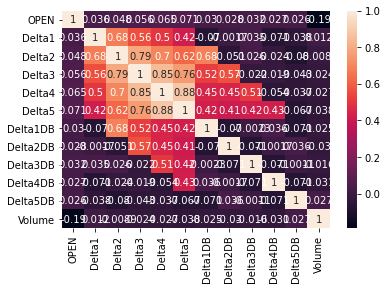

In [12]:
market_cor_mat = market.corr()
sns.heatmap(market_cor_mat, annot=True)
plt.show()

In [13]:
X1 = market.drop('Direction', axis=1)
y1 = market['Direction']
print(X1.head(10))
print(y1.head(10))

              OPEN    Delta1    Delta2    Delta3    Delta4    Delta5  \
date                                                                   
2014-04-04  574.65  0.008423  0.016889  0.028530  0.013689  0.023967   
2014-04-07  540.74 -0.059010 -0.051084 -0.043118 -0.032163 -0.046129   
2014-04-08  542.60  0.003440 -0.055773 -0.047820 -0.039826 -0.028834   
2014-04-09  559.62  0.031367  0.034915 -0.026155 -0.017952 -0.009708   
2014-04-10  565.00  0.009614  0.041283  0.044864 -0.016793 -0.008511   
2014-04-11  532.55 -0.057434 -0.048372 -0.018522 -0.015146 -0.073262   
2014-04-14  538.25  0.010703 -0.047345 -0.038187 -0.008017 -0.004605   
2014-04-15  536.82 -0.002657  0.008018 -0.049876 -0.040742 -0.010652   
2014-04-16  543.00  0.011512  0.008825  0.019623 -0.038938 -0.029699   
2014-04-17  548.81  0.010700  0.022335  0.019619  0.030532 -0.028655   

            Delta1DB  Delta2DB  Delta3DB  Delta4DB  Delta5DB     Volume  
date                                                         

In [14]:
X2 = market.drop(['Direction', 'Delta1', 'Delta3'], axis=1)
y2 = market['Direction']
print(X2.head(10))
print(y2.head(10))

              OPEN    Delta2    Delta4    Delta5  Delta1DB  Delta2DB  \
date                                                                   
2014-04-04  574.65  0.016889  0.013689  0.023967  0.008395  0.011448   
2014-04-07  540.74 -0.051084 -0.032163 -0.046129  0.008423  0.008395   
2014-04-08  542.60 -0.055773 -0.039826 -0.028834 -0.059010  0.008423   
2014-04-09  559.62  0.034915 -0.017952 -0.009708  0.003440 -0.059010   
2014-04-10  565.00  0.041283 -0.016793 -0.008511  0.031367  0.003440   
2014-04-11  532.55 -0.048372 -0.015146 -0.073262  0.009614  0.031367   
2014-04-14  538.25 -0.047345 -0.008017 -0.004605 -0.057434  0.009614   
2014-04-15  536.82  0.008018 -0.040742 -0.010652  0.010703 -0.057434   
2014-04-16  543.00  0.008825 -0.038938 -0.029699 -0.002657  0.010703   
2014-04-17  548.81  0.022335  0.030532 -0.028655  0.011512 -0.002657   

            Delta3DB  Delta4DB  Delta5DB     Volume  
date                                                 
2014-04-04 -0.014430  0.010

In [15]:
model1 = LogisticRegression()
scores1 = cross_validate(model1, X1, y1)
scores1['test_score'].mean()

0.5292305220883534

In [16]:
model2 = LogisticRegression()
scores2 = cross_validate(model2, X2, y2)
scores2['test_score'].mean()

0.5292305220883534

In [17]:
model3 = LinearDiscriminantAnalysis()
scores3 = cross_validate(model3, X1, y1, cv=10)
scores3['test_score'].mean()

0.5307741935483871

In [18]:
model4 = QuadraticDiscriminantAnalysis()
scores4 = cross_validate(model4, X1, y1, cv=10)
scores4['test_score'].mean()

0.5132

In [44]:
model5 = KNeighborsClassifier(n_neighbors=10)
scores5 = cross_validate(model5, X1, y1, cv=10)
scores5['test_score'].mean()

0.4643870967741936

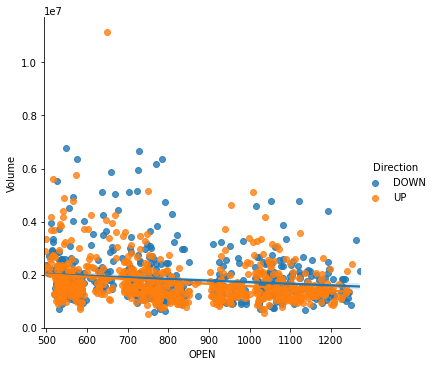

In [20]:
sns.lmplot(x='OPEN', y='Volume', data=market, hue='Direction' )

In [21]:
market2 = market

In [22]:
model6 = PCA(n_components=2)
model6.fit(X1)
X_PCA = model6.transform(X1)

In [23]:
market2['X_PCA1'] = X_PCA[:, 0]
market2['X_PCA2'] = X_PCA[:, 1]

/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


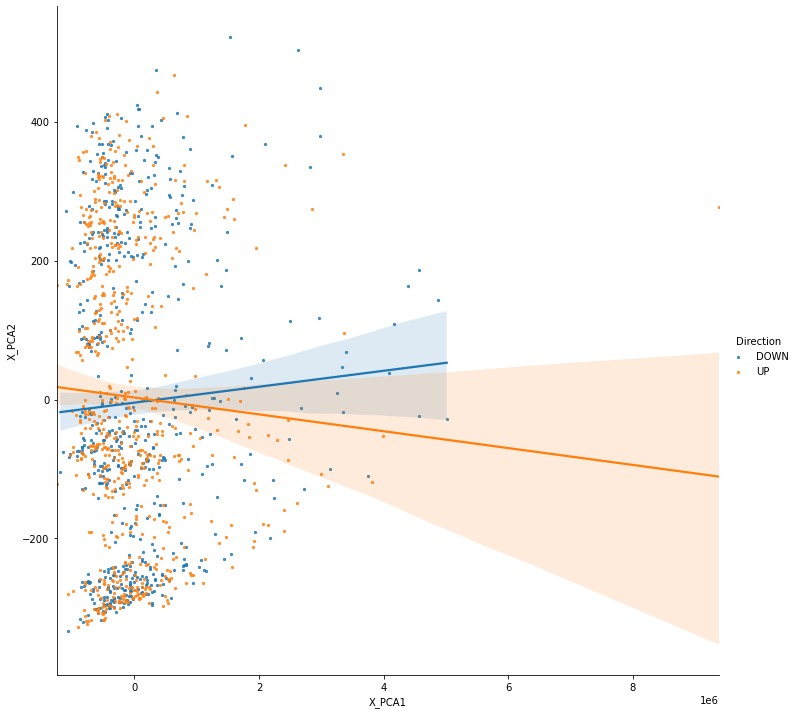

In [24]:
sns.lmplot(x='X_PCA1', y='X_PCA2', hue='Direction', data=market2, size=10, scatter_kws={"s": 5})

In [42]:
market2.loc[((market2.X_PCA1 > 2E6) & (market2.X_PCA2 > 0))]

,OPEN,Delta1,Delta2,Delta3,Delta4,Delta5,Delta1DB,Delta2DB,Delta3DB,Delta4DB,Delta5DB,Direction,Volume,X_PCA1,X_PCA2
date,,,,,,,,,,,,,,,
2015-07-17,649.00,0.148429,0.158660,0.186992,0.217910,0.233160,0.008909,0.024453,0.026047,0.012522,0.006060,UP,11164943.0,9.388224e+06,276.704300
2015-07-20,659.24,0.015778,0.166549,0.176941,0.205721,0.237127,0.148429,0.008909,0.024453,0.026047,0.012522,DOWN,5860872.0,4.084153e+06,37.999448
2015-08-11,669.20,0.046475,0.045249,0.037519,0.054971,0.064893,-0.001171,-0.007395,0.016821,0.009405,0.004925,DOWN,5029203.0,3.252484e+06,8.925328
2015-10-23,727.50,0.124942,0.112130,0.095567,0.100306,0.095451,-0.011389,-0.014894,0.004326,-0.004412,0.014435,DOWN,6653923.0,4.877204e+06,143.481036
2016-02-01,750.46,0.025877,0.039102,0.051550,0.051285,0.037149,0.012891,0.011980,-0.000252,-0.013447,-0.000028,UP,5139157.0,3.362438e+06,95.345983
2016-02-02,784.50,0.045359,0.072410,0.086234,0.099248,0.098970,0.025877,0.012891,0.011980,-0.000252,-0.013447,DOWN,6348126.0,4.571407e+06,186.128553
2016-02-03,770.22,-0.018203,0.026331,0.052889,0.066462,0.079238,0.045359,0.025877,0.012891,0.011980,-0.000252,DOWN,6171019.0,4.394300e+06,163.536092
2016-02-04,722.81,-0.061554,-0.078636,-0.036844,-0.011920,0.000817,-0.018203,0.045359,0.025877,0.012891,0.011980,DOWN,5168709.0,3.391990e+06,69.082995
2016-02-05,703.87,-0.026203,-0.086144,-0.102779,-0.062082,-0.037811,-0.061554,-0.018203,0.045359,0.025877,0.012891,DOWN,5105725.0,3.329006e+06,47.186860


In [34]:
X7 = market2.loc[:,['X_PCA1', 'X_PCA2']]
y7 = market2.Direction
X7
y7

date
2014-04-04    DOWN
2014-04-07      UP
2014-04-08      UP
2014-04-09      UP
2014-04-10    DOWN
              ... 
2019-03-15    DOWN
2019-03-18      UP
2019-03-19      UP
2019-03-20      UP
2019-03-21      UP
Name: Direction, Length: 1249, dtype: object

In [57]:
model7 = KNeighborsClassifier()
scores7 = cross_validate(model7, X7, y7, cv=10)
scores7['test_score'].mean()

0.4635935483870968

Optimum K       :  [1]
Optimum K Score :  [0.51718876]


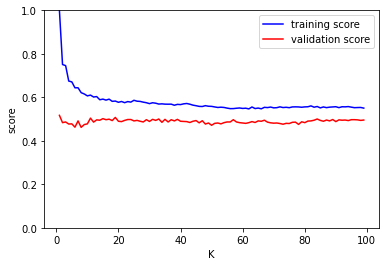

In [66]:
from sklearn.model_selection import validation_curve

K = np.arange(1, 100)
train_score, val_score = validation_curve(KNeighborsClassifier(), X7, y7, param_name='n_neighbors', param_range=K, cv=5)

plt.plot(K, np.mean(train_score, 1), color='b', label = 'training score')
plt.plot(K, np.mean(val_score, 1), color='r', label = 'validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('K')
plt.ylabel('score');
OptimumK = (K[(np.mean(val_score, 1) == np.mean(val_score, 1).max())])
print('Optimum K       : ', OptimumK)
print('Optimum K Score : ', np.mean(val_score, 1)[K==OptimumK])